In [1]:
## this program is written and run in google colab with GPU support
## writer :Tanvir rahman

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## create some x_data
## we use the linspace for that
## from 0 to 10 about 1000000 value between them
x_data = np.linspace(0.0,10.0,1000000)


In [4]:
len(x_data)
## we gonna add some noise to that data to

1000000

In [ ]:
## adding some noise data of 1000000 and add it ti the xdata
noise = np.random.randn(len(x_data)) ## noise of some random value

In [6]:
noise.shape

(1000000,)

In [7]:
noise  ## everything we try to do is random distribution

array([ 0.6203907 ,  1.13643937,  0.21489182, ..., -0.46830325,
       -0.0839077 , -1.09252427])

In [ ]:
## y=mx+b this equation has to be fit in this data
## creating the y value for the x data

#m=.5
#b=5
## this is the original data
## in th model we first assume and then converge


y_true=(.5*x_data)+5+noise

In [ ]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [ ]:
y_df = pd.DataFrame(data=y_true,columns=['Y Data'])

In [ ]:
my_data = pd.concat([x_df,y_df],axis=1)

In [12]:
my_data.head()

,X Data,Y Data
0,0.00000,5.620391
1,0.00001,6.136444
2,0.00002,5.214902
3,0.00003,5.888186
4,0.00004,4.963343


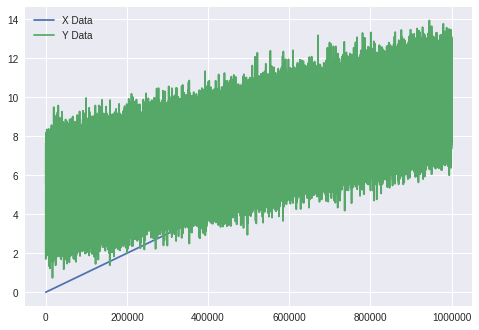

In [13]:
my_data.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


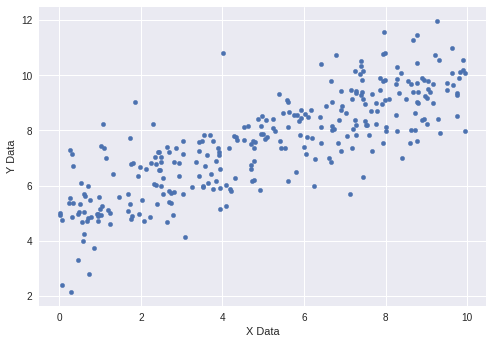

In [14]:
## its too dense lets take the sample 
my_data.sample(n=300).plot(kind='scatter',x='X Data',y='Y Data')

In [ ]:
## the data is too big we use the batch and feed the data batch wise
batch_size = 8

In [16]:
## lets add two value in the m and b just randomwise
## remember weight is always variable and data is always a placeholder
m=tf.Variable(0.81)
b=tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
## add the placeholder
## we have to add the placeholder for x and y
## we add the two parameter both datatype and size of the data
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [ ]:
## we create the placeholder and also the Variable now we create the model
y_model = m*xph+b

In [ ]:
## now we have to give the loss function
loss = tf.reduce_mean(tf.square(yph-y_model))

In [ ]:
## optimize the loss
## make the optoization
learning_rate=.001
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [ ]:
##initialize the variable
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
  sess.run(init)
  ## we use the 1000 batch
  batchs=1000
  ## we use random index of batch_size so the data will be feed randomly
  for i in range(batchs):
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    # first argument is the limit and second is how many data will be genarated
    ## we need the feed dict
    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])
    
    print("batch :"+str(i))
    print('--------------')
    print('m = '+str(model_m)+' b= '+str(model_b))
    

batch :0
--------------
m = 0.84292024 b= 0.17636782
batch :1
--------------
m = 0.8733092 b= 0.18249343
batch :2
--------------
m = 0.8931689 b= 0.18982095
batch :3
--------------
m = 0.91732776 b= 0.19531977
batch :4
--------------
m = 0.94651556 b= 0.20114839
batch :5
--------------
m = 0.96144575 b= 0.20720269
batch :6
--------------
m = 0.9818859 b= 0.21406023
batch :7
--------------
m = 0.99332184 b= 0.21781062
batch :8
--------------
m = 1.0041486 b= 0.22206375
batch :9
--------------
m = 1.0195802 b= 0.22852202
batch :10
--------------
m = 1.0275935 b= 0.2342828
batch :11
--------------
m = 1.0328039 b= 0.23547617
batch :12
--------------
m = 1.0380756 b= 0.23861769
batch :13
--------------
m = 1.0519563 b= 0.24171093
batch :14
--------------
m = 1.0637031 b= 0.24773127
batch :15
--------------
m = 1.0859843 b= 0.25290123
batch :16
--------------
m = 1.0965174 b= 0.25597212
batch :17
--------------
m = 1.1063737 b= 0.2617026
batch :18
--------------
m = 1.1162778 b= 0.26430333


In [23]:
model_m

0.9158032

In [24]:
model_b

2.1126943

In [ ]:
y_hat = x_data*model_m+model_b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


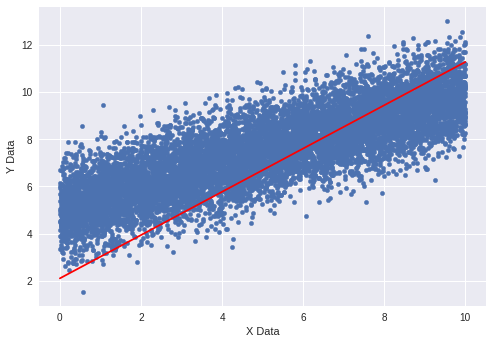

In [26]:
my_data.sample(10000).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(x_data,y_hat,'r')

**we now do the same thing with the estimator API**

In [ ]:
## we must create a feature place holder this is how the estimator works
## and it as to be  a list and you have to give it a name in this case it is x
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])] ## one dimensional

## why a list?? cause the the method will accept the data then convert to a list


In [28]:
## make the estimator model 
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2ucbg4sj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f63a09722b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3)

In [31]:
x_train.shape

(700000,)

In [32]:
x_eval.shape

(300000,)

In [ ]:
## now create the input 
input_f = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,shuffle=False)


In [34]:
input_f

<function tensorflow_estimator.python.estimator.inputs.numpy_io.numpy_input_fn.<locals>.input_fn>

In [35]:
estimator.train(input_fn=input_f,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp2ucbg4sj/model.ckpt.
INFO:tensorflow:loss = 431.13516, step = 0
INFO:tensorflow:global_step/sec: 397.068
INFO:tensorflow:loss = 29.021458, step = 100 (0.255 sec)
INFO:tensorflow:global_step/sec: 451.881
INFO:tensorflow:loss = 19.120691, step = 200 (0.222 sec)
INFO:tensorflow:global_step/sec: 450.934
INFO:tensorflow:loss = 13.863396, step = 300 (0.220 sec)
INFO:tensorflow:global_step/sec: 425.309
INFO:tensorfl

In [ ]:
## first make na tensoeflow feature column and five it a anme
## second make the estimator model
## then split the data into train and test data
## then take the numpy input for s and y and the feature should be insoide the dict obh

In [ ]:
#then train the data

In [ ]:
## now to use the feature placeholder and now feed the data with x_eval
## evaluate like this

In [ ]:
eval_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,shuffle=False)

In [40]:
train_metrics = estimator.evaluate(input_fn=input_f,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-08T11:12:55Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp2ucbg4sj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-08-11:12:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0643656, global_step = 1000, label/mean = 7.458981, loss = 8.514925, predictio

In [41]:
eval_metrics = estimator.evaluate(input_fn=eval_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-08T11:12:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2ucbg4sj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-08-11:13:00
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.060696, global_step = 1000, label/mean = 7.4870496, loss = 8.485568, prediction/mean = 7.345666
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [42]:
print(train_metrics)
print(eval_metrics)

{'average_loss': 1.0643656, 'label/mean': 7.458981, 'loss': 8.514925, 'prediction/mean': 7.3017306, 'global_step': 1000}
{'average_loss': 1.060696, 'label/mean': 7.4870496, 'loss': 8.485568, 'prediction/mean': 7.345666, 'global_step': 1000}


In [ ]:
## time for prediction
## make the data first
brand_new_data = np.linspace(0,10,10)

In [ ]:
b_input_fnc = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)
## see there is no y_value so it is not for any trainig or testing

In [45]:
list(estimator.predict(input_fn=b_input_fnc))
#3 take that in to list

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2ucbg4sj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.429835], dtype=float32)},
 {'predictions': array([5.0807657], dtype=float32)},
 {'predictions': array([5.7316966], dtype=float32)},
 {'predictions': array([6.3826275], dtype=float32)},
 {'predictions': array([7.033558], dtype=float32)},
 {'predictions': array([7.684489], dtype=float32)},
 {'predictions': array([8.33542], dtype=float32)},
 {'predictions': array([8.986351], dtype=float32)},
 {'predictions': array([9.637281], dtype=float32)},
 {'predictions': array([10.288212], dtype=float32)}]

In [46]:
## so lets again make the command but this time append the result in  a list
prediction = []

for item in estimator.predict(input_fn=b_input_fnc):
  prediction.append(item['predictions'])


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2ucbg4sj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
prediction

[array([4.429835], dtype=float32),
 array([5.0807657], dtype=float32),
 array([5.7316966], dtype=float32),
 array([6.3826275], dtype=float32),
 array([7.033558], dtype=float32),
 array([7.684489], dtype=float32),
 array([8.33542], dtype=float32),
 array([8.986351], dtype=float32),
 array([9.637281], dtype=float32),
 array([10.288212], dtype=float32)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


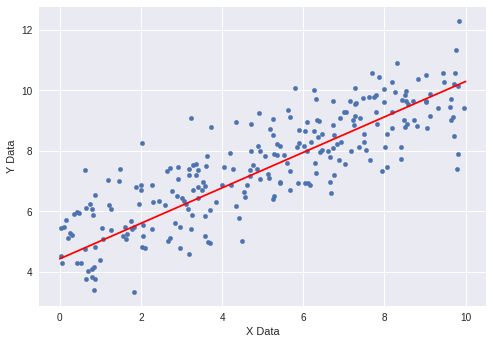

In [50]:
## lets check the data with others
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')
plt.plot(brand_new_data,prediction,'r')